# Elasto Plastic material model
In this notebook you can see how to use the provided code to model the stress strain curve of an elasto plastic material a using a predictor-corrector algorithm

### Defining a strain profile
* first we define a strain profile that we want to apply to the material

In [1]:
import sys
import os

# Add parent directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Rest of the imports
import numpy as np
import matplotlib.pyplot as plt
from src.corrector_predictor import InputStrain, Isotropic_EP, Kinematic_EP, main_loop

1. Elastic region
* Here we can see the performance the algorithm in the elastic region

Stress Strain curve

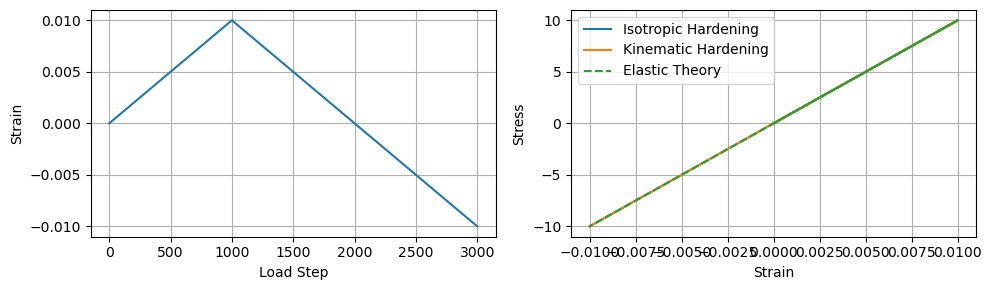

In [2]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
eps = [0, 0.01, -0.01]
load_step_list = [1000, 2000]
input_strain = InputStrain(eps, load_step_list)
eps_array = input_strain.strain_profile()
ax[0].plot(eps_array)
ax[0].grid()
ax[0].set_xlabel('Load Step')
ax[0].set_ylabel('Strain')
mat = Isotropic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Isotropic Hardening')
mat = Kinematic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Kinematic Hardening')
sigma_theory = 1000*eps_array
ax[1].plot(eps_array, sigma_theory, '--', label = 'Elastic Theory')
ax[1].grid()
ax[1].set_xlabel('Strain')
ax[1].set_ylabel('Stress')
plt.legend()
plt.tight_layout()

2. Elastic-plastic region
* Here we can see the performance the algorithm in the elastic-plastic region

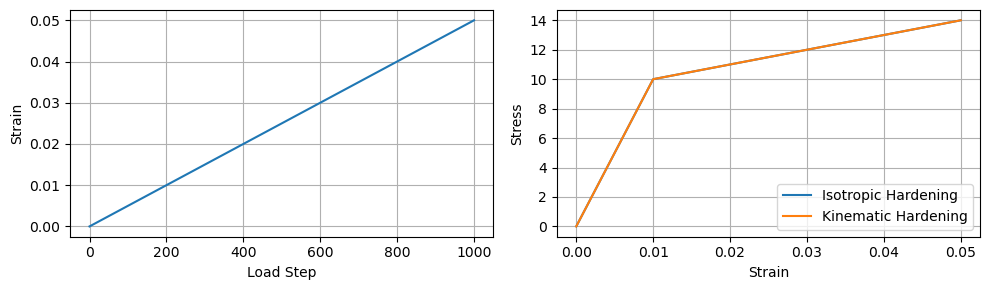

In [3]:
eps = [0, 0.05]
load_step_list = [1000]
input_strain = InputStrain(eps, load_step_list)
eps_array = input_strain.strain_profile()
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
ax[0].plot(eps_array)
ax[0].grid()
ax[0].set_xlabel('Load Step')
ax[0].set_ylabel('Strain')
mat = Isotropic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Isotropic Hardening')
mat = Kinematic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Kinematic Hardening')
ax[1].grid()
ax[1].set_xlabel('Strain')
ax[1].set_ylabel('Stress')
plt.legend()
plt.tight_layout()

3. Cyclic loading
* Here we can see the performance the algorithm in the cyclic loading

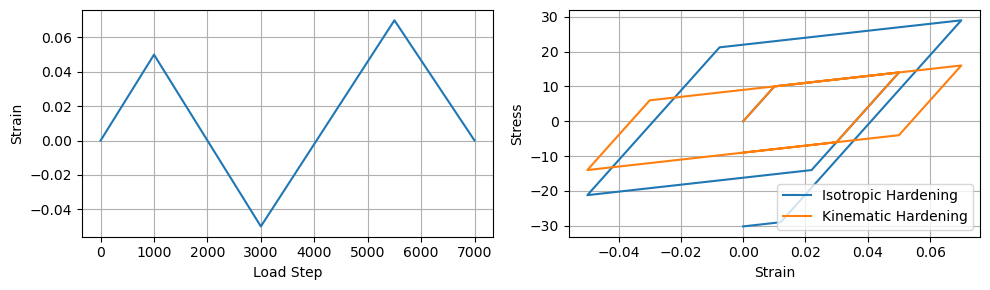

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
eps = [0, 0.05, -0.05, 0.07, 0.0]
load_step_list = [1000, 2000, 2500, 1500 ]
input_strain = InputStrain(eps, load_step_list)
eps_array = input_strain.strain_profile()
ax[0].plot(eps_array)
ax[0].grid()
ax[0].set_xlabel('Load Step')
ax[0].set_ylabel('Strain')
mat = Isotropic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Isotropic Hardening')
mat = Kinematic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Kinematic Hardening')
ax[1].grid()
ax[1].set_xlabel('Strain')
ax[1].set_ylabel('Stress')
plt.legend()
plt.tight_layout()

4. A more complex strain profile
* Here we can see the performance the algorithm in a more complex strain profile (honestly I don't know what to expect!)

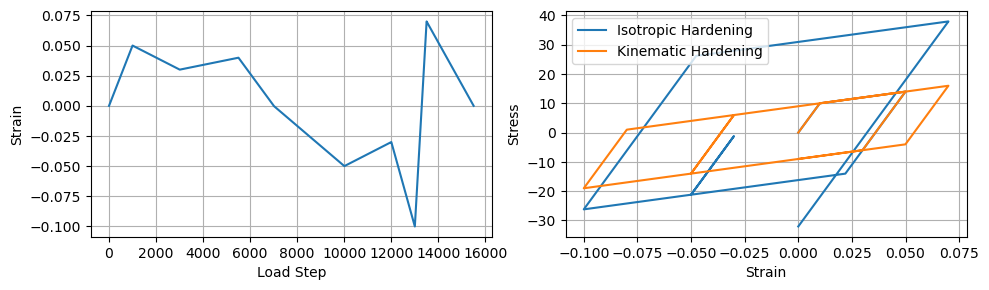

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (10, 3))
eps = [0, 0.05, 0.03, 0.04, 0.0, -0.05, -0.03, -0.1, 0.07, 0.0]
load_step_list = [1000, 2000, 2500, 1500, 3000, 2000, 1000, 500, 2000]
input_strain = InputStrain(eps, load_step_list)
eps_array = input_strain.strain_profile()
ax[0].plot(eps_array)
ax[0].grid()
ax[0].set_xlabel('Load Step')
ax[0].set_ylabel('Strain')
mat = Isotropic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Isotropic Hardening')
mat = Kinematic_EP(E = 1000, E_t = 100, Y_0 = 10)
sigma_list, eps_p_list = main_loop(mat, eps_array)
ax[1].plot(eps_array, sigma_list, label = 'Kinematic Hardening')
ax[1].grid()
ax[1].set_xlabel('Strain')
ax[1].set_ylabel('Stress')
plt.legend()
plt.tight_layout()